In [1]:
import pandas as pd
import numpy as np
dt = pd.read_csv('../data/model1.csv')
# откуда то при пересохранении в csv образуется лишний столбец
dt.drop(dt.columns[[0]], axis = 1, inplace = True)

# подготовим данные для модели
X = dt.drop(['claim'], axis = 1)
Y = dt.claim

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt


def rocauccurve(model, n_epochs = 0):
    if n_epochs == 0:
        model.fit(X_train, y_train)
    else:
        model.fit(X_train, y_train, epochs=n_epochs)
    pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    plt.title('Оценка качества модели')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#     print(y_test[:10])
#     print(pred[:10])

dt.head()

,INS_JUR,OWN_JUR,AGR_KBM,TS_POWER,f1_daysbeforestart,f2_AGR_SRC_True,f2_AGR_SRC_False,f3_AGR_CREATEDBY_True,f3_AGR_CREATEDBY_False,f4_TS_TYPE_True,...,TS_USE_NAME_Дорожные и специальные ТС,TS_USE_NAME_Инкассация,TS_USE_NAME_Личная,TS_USE_NAME_Перевозка опасных грузов,TS_USE_NAME_Прокат или краткосрочная аренда,TS_USE_NAME_Прочее,TS_USE_NAME_Регулярные пассажирские перевозки,"TS_USE_NAME_Такси, Маршрутное такси",TS_USE_NAME_Учебная езда,TS_USE_NAME_Экстренные и коммунальные службы
0,1,1,0.90,180.0,2,0.346128,0.40601,0.063680,0.090337,0.060063,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0.85,156.4,3,0.346128,0.40601,0.050465,0.067729,0.060063,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0.80,235.0,5,0.346128,0.40601,0.050465,0.067729,0.060063,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0.80,235.0,5,0.346128,0.40601,0.040590,0.044280,0.060063,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1.00,156.4,6,0.346128,0.40601,0.050465,0.067729,0.060063,...,0,0,1,0,0,0,0,0,0,0


In [2]:
from collections import Counter
Counter(y_test)


Counter({0: 20225, 1: 1137})

In [3]:
def cmatrix(model, X_test, Y_test, limit, prn = False):
#     if prn == True:
#         print(y_test[:10])
#         print(pred[:10])
    pred = model.predict(X_test)
    pred_binary = []
    for i in pred:
        if i > limit:
            pred_binary.append(1)
        else:
            pred_binary.append(0)
    fpr, tpr, threshold = roc_curve(Y_test, pred_binary)
    roc_auc = auc(fpr, tpr)
    plt.title('Оценка качества модели')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    return confusion_matrix(Y_test, pred_binary)

In [24]:
from collections import Counter
Counter(pred_binary).values()

dict_values([21085, 2])

In [9]:
Y.value_counts()

0    99969
1     5463
Name: claim, dtype: int64

In [4]:
# попробуем решить задачу ансамблем деревьев
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 30)

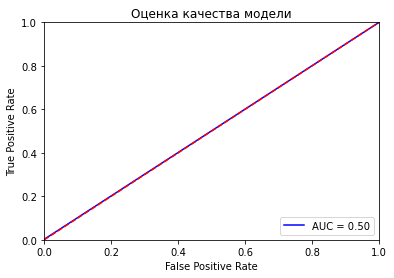

In [5]:
# попробуем другие модели
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
rocauccurve(model)

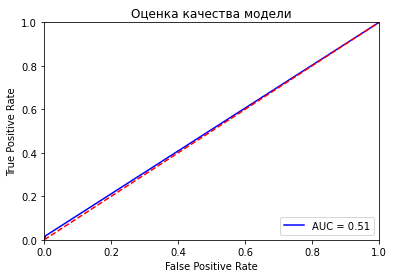

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
rocauccurve(model)

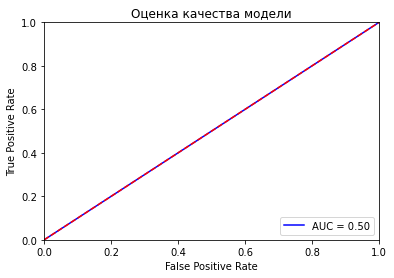

In [84]:
from sklearn.svm import SVC
model = SVC()
rocauccurve(model)

In [286]:
def rasc(y_true, y_pred):
    y_true_f = np.array(y_true)
    y_pred_f = np.array(y_pred)
    return 1-roc_auc_score(y_true, y_pred)

In [330]:
# попробуем использовать неиросеть на базе Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import metrics
import keras.backend as K

METRICS = [
#       metrics.TruePositives(name='tp'),
#       metrics.FalsePositives(name='fp'),
#       metrics.TrueNegatives(name='tn'),
#       metrics.FalseNegatives(name='fn'), 
#       metrics.BinaryAccuracy(name='accuracy'),
#       metrics.Precision(name='precision'),
#       metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
#       metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

modelkr = Sequential()
modelkr.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
modelkr.add(Dense(24, activation='relu'))
modelkr.add(Dense(8, activation='relu'))
# modelkr.add(Dropout(0.9))
modelkr.add(Dense(1, activation='sigmoid')
      
         )
# компилируем модель
modelkr.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

In [328]:
k0 = 0.1
kw = {0:0.2, 1:1-k0}

In [396]:
# rocauccurve(modelkr, n_epochs = 100)
# modelkr.fit(Xs_train, ys_train, epochs=10)
modelkr.fit(X_train, y_train, batch_size= 10000, epochs=200)

Epoch 1/200
9/9 [==============================] - 0s 19ms/step - loss: 0.1914 - auc: 0.6744
Epoch 2/200
9/9 [==============================] - 0s 19ms/step - loss: 0.1928 - auc: 0.6660
Epoch 3/200
9/9 [==============================] - 0s 19ms/step - loss: 0.1937 - auc: 0.6580
Epoch 4/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1917 - auc: 0.6708
Epoch 5/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1936 - auc: 0.6581
Epoch 6/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1927 - auc: 0.6641
Epoch 7/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1911 - auc: 0.6760
Epoch 8/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1915 - auc: 0.6723
Epoch 9/200
9/9 [==============================] - 0s 20ms/step - loss: 0.1914 - auc: 0.6727
Epoch 10/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1913 - auc: 0.6733
Epoch 11/200
9/9 [==============================] - 0s 21ms/step - lo

9/9 [==============================] - 0s 21ms/step - loss: 0.1919 - auc: 0.6698
Epoch 175/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1913 - auc: 0.6747
Epoch 176/200
9/9 [==============================] - 0s 24ms/step - loss: 0.1906 - auc: 0.6797
Epoch 177/200
9/9 [==============================] - 0s 24ms/step - loss: 0.1902 - auc: 0.6823
Epoch 178/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1907 - auc: 0.6788
Epoch 179/200
9/9 [==============================] - 0s 27ms/step - loss: 0.1910 - auc: 0.6769
Epoch 180/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1912 - auc: 0.6750
Epoch 181/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1902 - auc: 0.6817
Epoch 182/200
9/9 [==============================] - 0s 21ms/step - loss: 0.1904 - auc: 0.6813
Epoch 183/200
9/9 [==============================] - 0s 22ms/step - loss: 0.1909 - auc: 0.6770
Epoch 184/200
9/9 [==============================] - 0s 21ms/ste

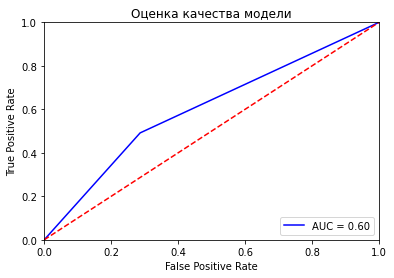

array([[14430,  5795],
       [  578,   559]], dtype=int64)

In [440]:
cmatrix(modelkr, X_test = X_test, Y_test = y_test, limit=0.06)

In [379]:
# минимизируем набор данных

Xmin = X[['INS_JUR', 'OWN_JUR', 'AGR_KBM', 'TS_POWER',
       'f2_AGR_SRC_True', 'f2_AGR_SRC_False', 'f3_AGR_CREATEDBY_True',
       'f3_AGR_CREATEDBY_False', 'f4_TS_TYPE_True', 'f4_TS_TYPE_False',
       'f5_TS_CATEGORY_True', 'f5_TS_CATEGORY_False', 'f6_TS_MARK_NAME_True',
       'f6_TS_MARK_NAME_False',
       'f8_car_age_on_start', 'f9_OWN_REG_True',
       'f9_OWN_REG_False',
       'f14_is_prolongation',
       'f15_drivers_count', 'f17_drv_age_min', 'f18_drv_age_max',
       'f19_drv_skill_min', 'f20_drv_skill_max', 'f16_kbm_min',
       'f21_oneperson', 'f22_agr_days']]

Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xmin, Y, test_size=0.2, random_state=42)

In [380]:
METRICSS = [
#       metrics.TruePositives(name='tp'),
#       metrics.FalsePositives(name='fp'),
#       metrics.TrueNegatives(name='tn'),
#       metrics.FalseNegatives(name='fn'), 
#       metrics.BinaryAccuracy(name='accuracy'),
#       metrics.Precision(name='precision'),
#       metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
#       metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

models = Sequential()
models.add(Dense(12, input_dim=Xs_train.shape[1], activation='relu'))
models.add(Dense(24, activation='relu'))
models.add(Dense(8, activation='relu'))
# models.add(Dense(8, activation='relu'))
# modelmms.add(Dropout(0.9))
models.add(Dense(1, activation='sigmoid')
      
         )
# компилируем модель
models.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICSS)

In [443]:
models.predict(Xs_test)

array([[0.0300439 ],
       [0.05567271],
       [0.02475983],
       ...,
       [0.03608221],
       [0.07843921],
       [0.0322648 ]], dtype=float32)

In [381]:
models.fit(Xs_train, ys_train, batch_size= 10000, epochs=100)

Epoch 1/100
9/9 [==============================] - 1s 20ms/step - loss: 8.9336 - auc: 0.4948
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.3517 - auc: 0.4655
Epoch 3/100
9/9 [==============================] - 0s 20ms/step - loss: 0.6468 - auc: 0.4991
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.7274 - auc: 0.4992
Epoch 5/100
9/9 [==============================] - 0s 23ms/step - loss: 0.6728 - auc: 0.4992
Epoch 6/100
9/9 [==============================] - 0s 20ms/step - loss: 0.5819 - auc: 0.4991
Epoch 7/100
9/9 [==============================] - 0s 21ms/step - loss: 0.4565 - auc: 0.4974
Epoch 8/100
9/9 [==============================] - 0s 21ms/step - loss: 0.3480 - auc: 0.4630
Epoch 9/100
9/9 [==============================] - 0s 20ms/step - loss: 0.2508 - auc: 0.4353
Epoch 10/100
9/9 [==============================] - 0s 21ms/step - loss: 0.2538 - auc: 0.4177
Epoch 11/100
9/9 [==============================] - 0s 24ms/step - lo

In [137]:
# нормализуем данные
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
dtmms = pd.DataFrame(min_max_scaler.fit_transform(dt))
dtmms.columns = dt.columns
Xmms = dtmms.drop(['claim'], axis = 1)
Ymms = dtmms.claim
Xmms_train, Xmms_test, ymms_train, ymms_test = train_test_split(Xmms, Ymms, test_size=0.2, random_state=42)

In [424]:
METRICSMMS = [
#       metrics.TruePositives(name='tp'),
#       metrics.FalsePositives(name='fp'),
#       metrics.TrueNegatives(name='tn'),
#       metrics.FalseNegatives(name='fn'), 
#       metrics.BinaryAccuracy(name='accuracy'),
#       metrics.Precision(name='precision'),
#       metrics.Recall(name='recall'),
      metrics.AUC(name='auc'),
#       metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

modelmms = Sequential()
modelmms.add(Dense(60, input_dim=Xmms_train.shape[1], activation='relu'))
# modelmms.add(Dense(24, activation='relu'))
modelmms.add(Dense(8, activation='relu'))
# modelmms.add(Dropout(0.9))
modelmms.add(Dense(1, activation='sigmoid')
      
         )
# компилируем модель
modelmms.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICSMMS)

In [429]:
# from keras import backend as K
# K.set_value(modelmms.optimizer.learning_rate, 0.02)
modelmms.fit(Xmms_train, ymms_train, batch_size= 20000, epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 33ms/step - loss: 0.1868 - auc: 0.7033
Epoch 2/100
5/5 [==============================] - 0s 32ms/step - loss: 0.1867 - auc: 0.7037
Epoch 3/100
5/5 [==============================] - 0s 38ms/step - loss: 0.1867 - auc: 0.7031
Epoch 4/100
5/5 [==============================] - 0s 36ms/step - loss: 0.1866 - auc: 0.7038
Epoch 5/100
5/5 [==============================] - 0s 36ms/step - loss: 0.1866 - auc: 0.7038
Epoch 6/100
5/5 [==============================] - 0s 36ms/step - loss: 0.1866 - auc: 0.7035
Epoch 7/100
5/5 [==============================] - 0s 34ms/step - loss: 0.1866 - auc: 0.7038
Epoch 8/100
5/5 [==============================] - 0s 36ms/step - loss: 0.1866 - auc: 0.7037
Epoch 9/100
5/5 [==============================] - 0s 35ms/step - loss: 0.1866 - auc: 0.7037
Epoch 10/100
5/5 [==============================] - 0s 42ms/step - loss: 0.1866 - auc: 0.7043
Epoch 11/100
5/5 [==============================] - 0s 37ms/step - lo

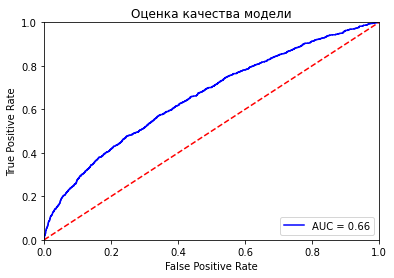

array([[12527,  7698],
       [  457,   680]], dtype=int64)

In [437]:
cmatrix(modelmms, X_test = Xmms_test, Y_test = ymms_test, limit=0.045)

In [54]:
from catboost import CatBoostClassifier, Pool, cv
import hyperopt

categorical_features_indices = []
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)

In [340]:
modelcb = CatBoostClassifier(
        learning_rate=0.1,
        loss_function='Logloss',
        depth=12,
        iterations=50,
        eval_metric='AUC',
#         od_type='Iter',
#         od_wait=40,
#         random_seed=42,
#         logging_level='Silent',
        allow_writing_files=False
    )

0:	total: 78.4ms	remaining: 3.84s
1:	total: 247ms	remaining: 5.93s
2:	total: 442ms	remaining: 6.93s
3:	total: 626ms	remaining: 7.2s
4:	total: 810ms	remaining: 7.29s
5:	total: 983ms	remaining: 7.21s
6:	total: 1.24s	remaining: 7.64s
7:	total: 1.43s	remaining: 7.49s
8:	total: 1.62s	remaining: 7.37s
9:	total: 1.75s	remaining: 7.02s
10:	total: 2s	remaining: 7.08s
11:	total: 2.19s	remaining: 6.92s
12:	total: 2.45s	remaining: 6.98s
13:	total: 2.65s	remaining: 6.82s
14:	total: 2.83s	remaining: 6.61s
15:	total: 3.01s	remaining: 6.39s
16:	total: 3.19s	remaining: 6.2s
17:	total: 3.47s	remaining: 6.16s
18:	total: 3.66s	remaining: 5.97s
19:	total: 3.88s	remaining: 5.82s
20:	total: 4.07s	remaining: 5.62s
21:	total: 4.27s	remaining: 5.44s
22:	total: 4.48s	remaining: 5.26s
23:	total: 4.69s	remaining: 5.08s
24:	total: 4.9s	remaining: 4.9s
25:	total: 5.08s	remaining: 4.69s
26:	total: 5.27s	remaining: 4.49s
27:	total: 5.49s	remaining: 4.31s
28:	total: 5.73s	remaining: 4.15s
29:	total: 5.91s	remaining: 3.

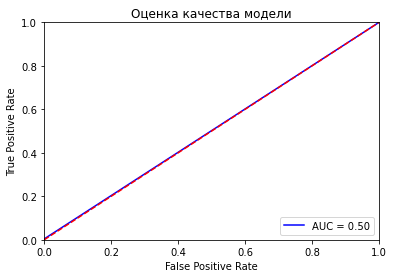

array([[20218,     7],
       [ 1132,     5]], dtype=int64)

In [341]:
modelcb.fit(X_train, y_train)
cmatrix(modelcb, X_test = X_test, Y_test = y_test, limit=0.05)

In [352]:
modelcb.get_feature_importance(prettified=True,)

,Feature Id,Importances
0,AGR_KBM,7.974466
1,f3_AGR_CREATEDBY_True,5.944844
2,f7_TS_MODEL_NAME_True,5.521654
3,f6_TS_MARK_NAME_False,4.946350
4,f1_daysbeforestart,4.721574
...,...,...
61,TS_USE_NAME_Дорожные и специальные ТС,0.000000
62,TS_USE_NAME_Инкассация,0.000000
63,TS_USE_NAME_Перевозка опасных грузов,0.000000
64,TS_USE_NAME_Прокат или краткосрочная аренда,0.000000
